In [74]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [10]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
#droping column having missing value more than 40%
train.drop('Cabin', axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7492\2450647732.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age)


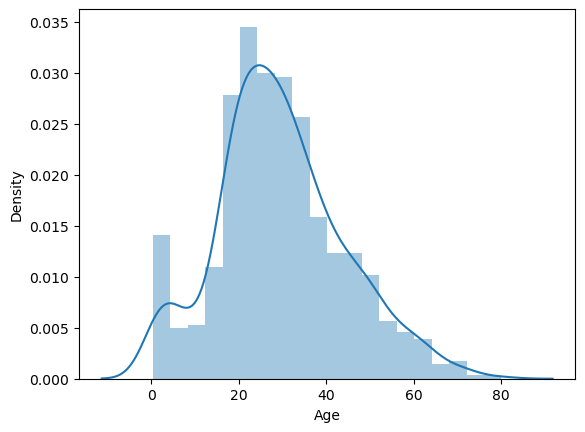

In [18]:
#imputing age column missing values
sns.distplot(train.Age)
train.Age.fillna(train.Age.median(), inplace=True)

In [38]:
train.dropna(inplace=True)

In [42]:
train['Sex_num']=train.Sex.apply( lambda x : 1 if x=='male' else 0)

In [50]:
col=['Age', 'Fare']
std=StandardScaler()
for i in col:
    std.fit(train[[i]])
    train[[i]]=std.transform(train[[i]])
    

In [60]:
def condition(x):
    if x=='S':
        return 0
    elif x=='C':
        return 1
    else:
        return 2


train['embarked_num']=train.Embarked.apply(condition)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.563674,1,0,A/5 21171,-0.500240,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.669217,1,0,PC 17599,0.788947,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.255451,0,0,STON/O2. 3101282,-0.486650,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.438050,1,0,113803,0.422861,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0.438050,0,0,373450,-0.484133,S,1,0


In [63]:
x=train.iloc[:,[2,5,6,7,9,11,12]]
y=train.iloc[:,1]

In [68]:
xtr, xte, ytr, yte=tts(x,y,test_size=0.3)

In [69]:
# training  model 1
lr=LogisticRegression()
lr.fit(xtr,ytr)

LogisticRegression()

In [70]:
yp=lr.predict(xte)

In [71]:
#confusion matrix
confusion_matrix(yte, yp)

array([[134,  19],
       [ 37,  77]], dtype=int64)

In [72]:
#score
precision_score(yte,yp)

0.8020833333333334

In [75]:
accuracy_score(yte,yp)

0.7902621722846442

In [ ]:
#train model 2

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=10)

In [83]:
ypredict2=knc.predict(xte)
accuracy_score(yte,ypredict2)

0.7790262172284644